In [105]:
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("../")

from src.testers import ScalarPolarTester, ScalarCartesianTester
from src.testers import polar_gaussian, polar_step, polar_exp, polar_logstep, polar_rsq

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test cases (I): aberrated pupil

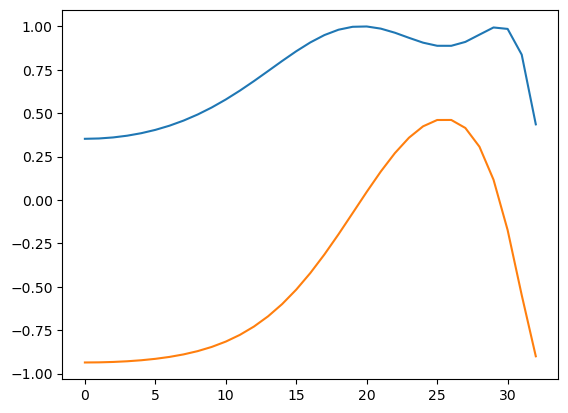

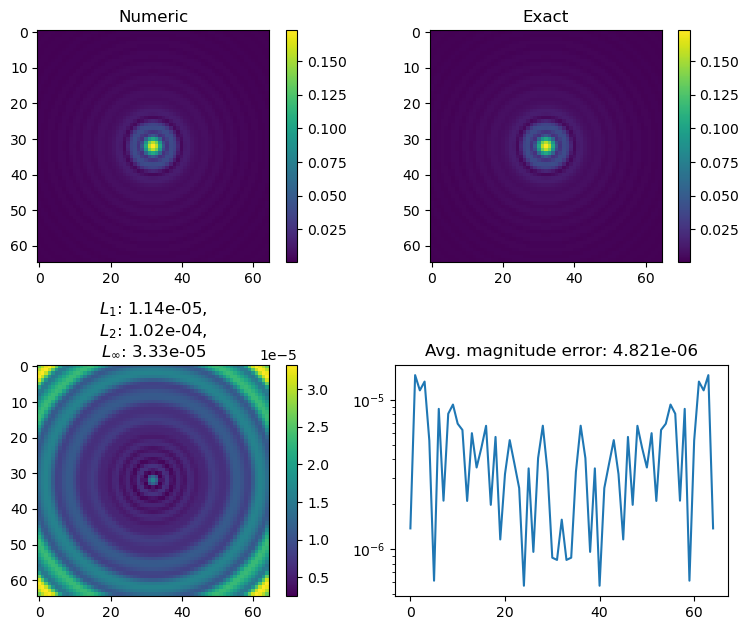

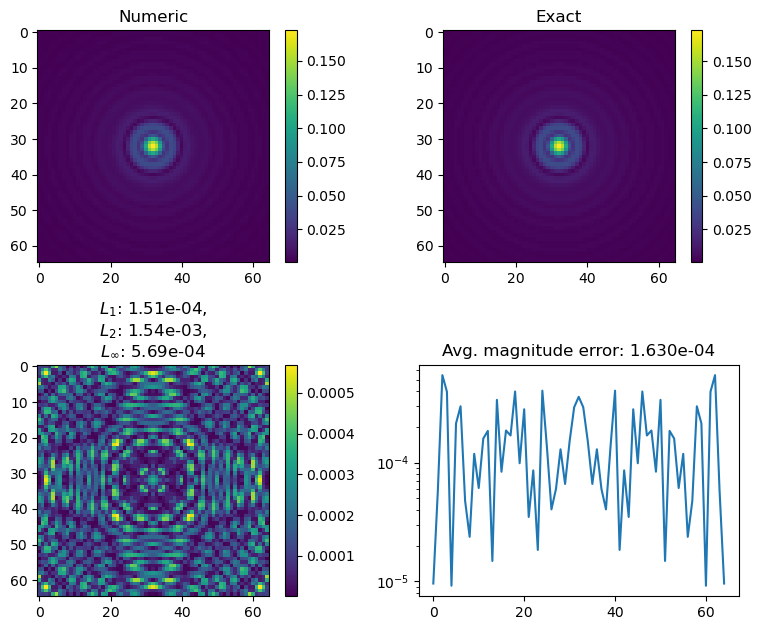

In [106]:
from src.pupil import ScalarPolarPupil
from src.test_pupils import get_polar_ck

import numpy as np
np.random.seed(1)
ck = get_polar_ck(4)

pupil = ScalarPolarPupil(
    n_pix_pupil=32+1,
    zernike_coefficients=ck,
)

plt.figure()
plt.plot(pupil.field.real.squeeze(), "Re\{e_inf\}")
plt.plot(pupil.field.imag.squeeze(), "Im\{e_inf\}")

Ep_ref, Ep_num = ScalarPolarTester.eval_error_for_pupil(pupil, plot=True)[1:]
Ec_ref, Ec_num = ScalarCartesianTester.eval_error_for_pupil(pupil, plot=True)[1:]

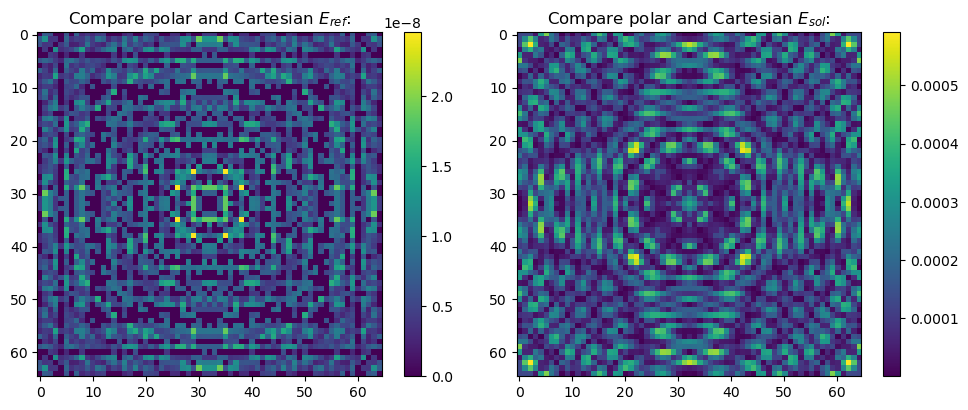

In [107]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

tensor([  5,   9,  17,  33,  65, 129])


  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [05:03<00:00, 50.58s/it]


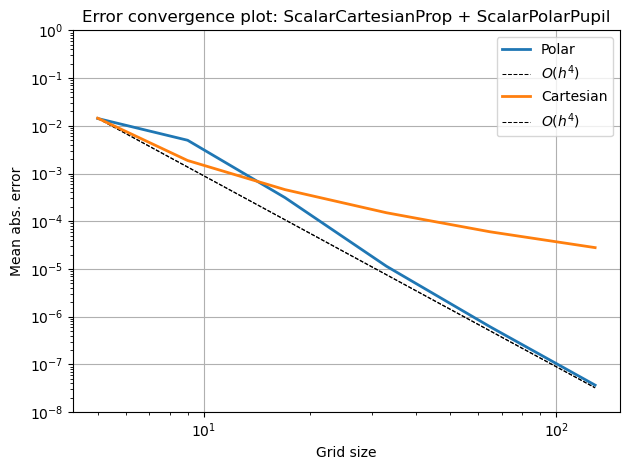

In [108]:
Ns = 2 ** (torch.arange(8)[2:]) + 1
print(Ns)

ScalarPolarTester.plot_convergence_for_pupil(pupil, Ns=Ns)
ScalarCartesianTester.plot_convergence_for_pupil(pupil, Ns=Ns)

# Test cases (II): analytic pupil functions
Compare Cartesian solution against its computed reference:

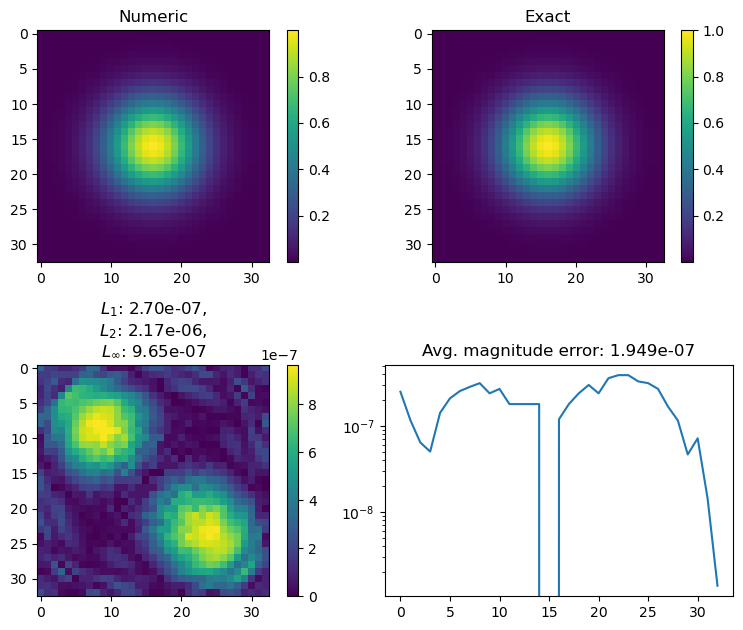

In [24]:
N = 32 + 1

Ec_ref, Ec_num = ScalarCartesianTester.eval_error_for_testcase(N, polar_gaussian, plot=True)[1:]

Compare polar solution against its computed reference:

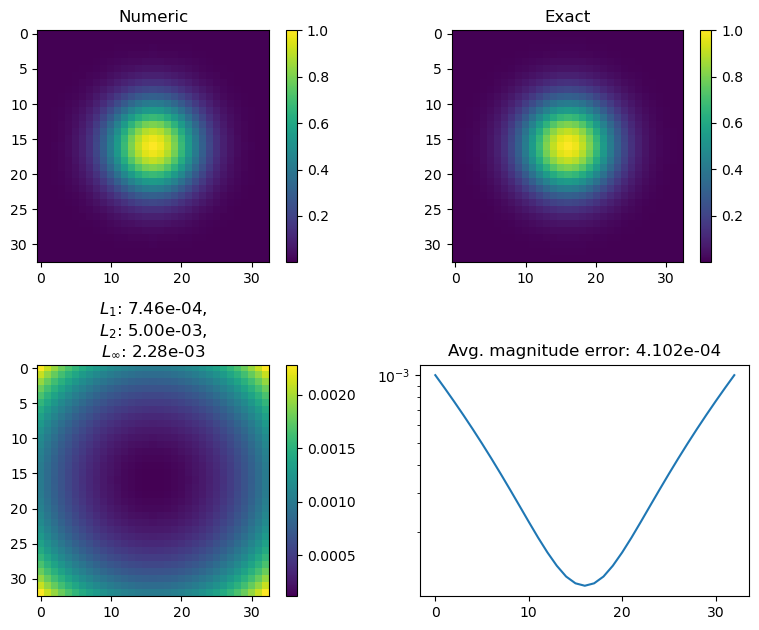

In [25]:
Ep_ref, Ep_num = ScalarPolarTester.eval_error_for_testcase(N, polar_gaussian, plot=True)[1:]

Compare polar and Cartesian solutions directly:

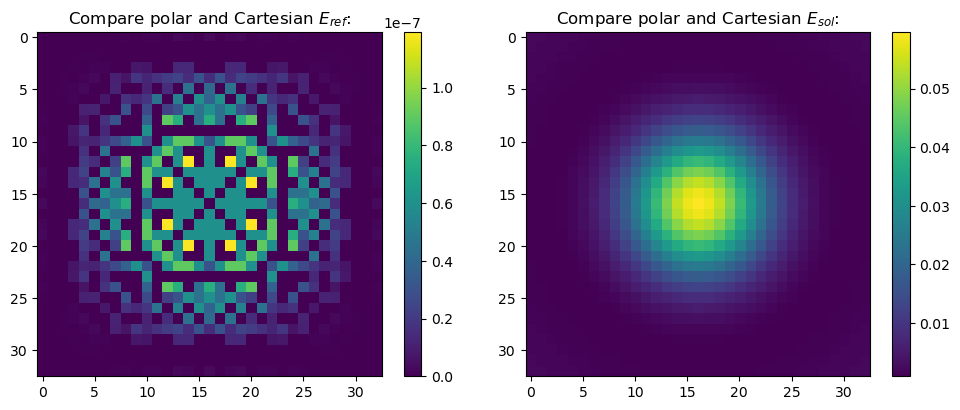

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

Convergence plots for various test functions:

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 142.43it/s]


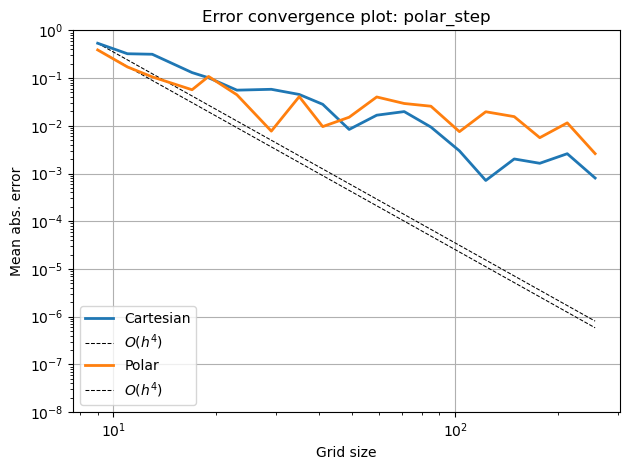

In [27]:
ScalarCartesianTester.plot_convergence_for_testcase(polar_step)
ScalarPolarTester    .plot_convergence_for_testcase(polar_step)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:05<00:00,  3.65it/s]


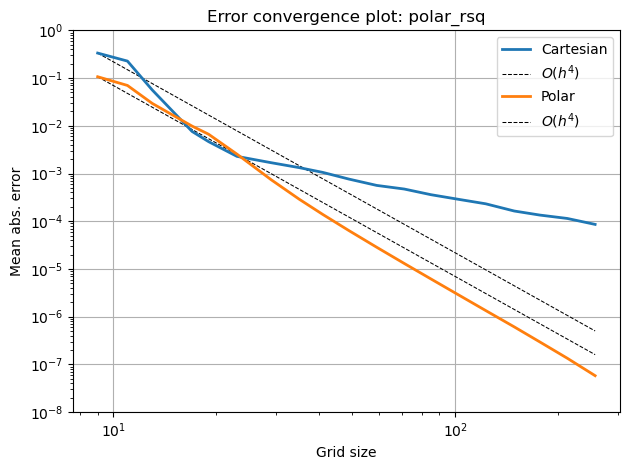

In [28]:
ScalarCartesianTester.plot_convergence_for_testcase(polar_rsq)
ScalarPolarTester    .plot_convergence_for_testcase(polar_rsq)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:05<00:00,  3.95it/s]


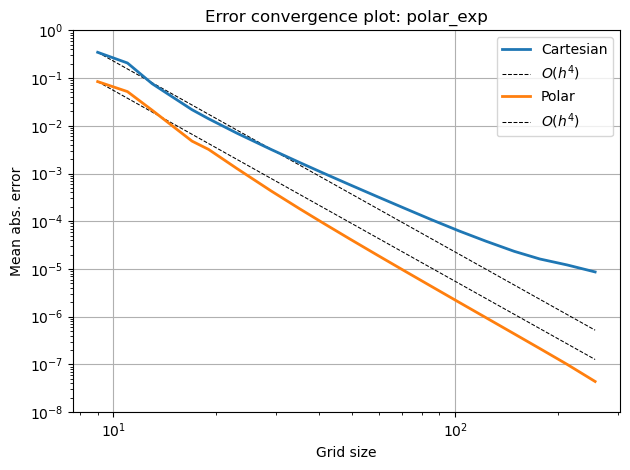

In [29]:
ScalarCartesianTester.plot_convergence_for_testcase(polar_exp)
ScalarPolarTester    .plot_convergence_for_testcase(polar_exp)

100%|██████████| 20/20 [00:00<00:00, 164.58it/s]


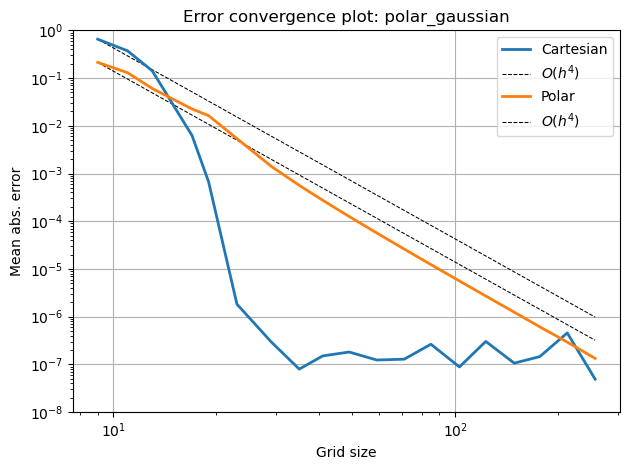

In [30]:
ScalarCartesianTester.plot_convergence_for_testcase(polar_gaussian)
ScalarPolarTester    .plot_convergence_for_testcase(polar_gaussian)

100%|██████████| 20/20 [00:00<00:00, 159.40it/s]


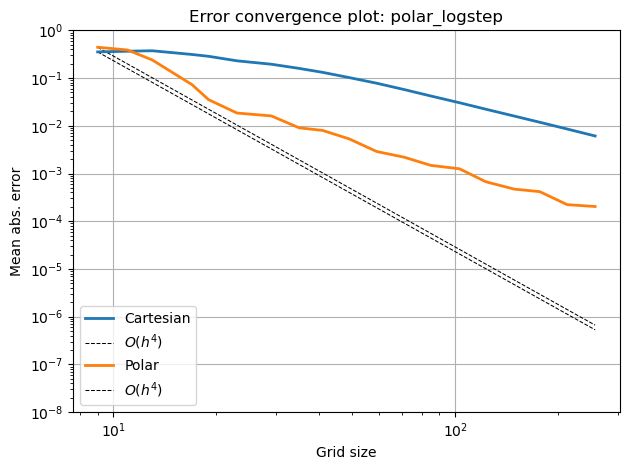

In [31]:
ScalarCartesianTester.plot_convergence_for_testcase(polar_logstep)
ScalarPolarTester    .plot_convergence_for_testcase(polar_logstep)